# Cooke Triplet

In [1]:
import numpy as np

from optiland import analysis, mtf, optic, psf, wavefront

In [2]:
lens = optic.Optic()

lens.add_surface(index=0, radius=np.inf, thickness=np.inf)
lens.add_surface(index=1, radius=22.01359, thickness=3.25896, material="SK16")
lens.add_surface(index=2, radius=-435.76044, thickness=6.00755)
lens.add_surface(
    index=3,
    radius=-22.21328,
    thickness=0.99997,
    material=("F2", "schott"),
)
lens.add_surface(index=4, radius=20.29192, thickness=4.75041, is_stop=True)
lens.add_surface(index=5, radius=79.68360, thickness=2.95208, material="SK16")
lens.add_surface(index=6, radius=-18.39533, thickness=42.20778)
lens.add_surface(index=7)

# add aperture
lens.set_aperture(aperture_type="EPD", value=10)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)
lens.add_field(y=14)
lens.add_field(y=20)

# add wavelength
lens.add_wavelength(value=0.48)
lens.add_wavelength(value=0.55, is_primary=True)
lens.add_wavelength(value=0.65)

lens.update_paraxial()

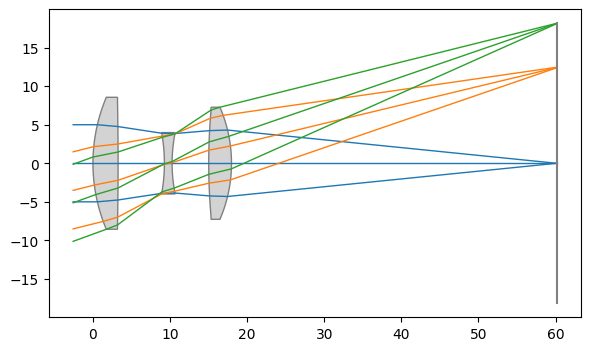

In [3]:
lens.draw()

In [4]:
lens.draw3D()

In [5]:
(
    lens.paraxial.f2(),
    lens.paraxial.F2(),
    lens.paraxial.FNO(),
    lens.paraxial.EPL(),
    lens.paraxial.XPD(),
)

(np.float64(49.9997830714319),
 np.float64(0.20707755895880453),
 np.float64(4.99997830714319),
 np.float64(11.512158673746795),
 np.float64(10.233729452318345))

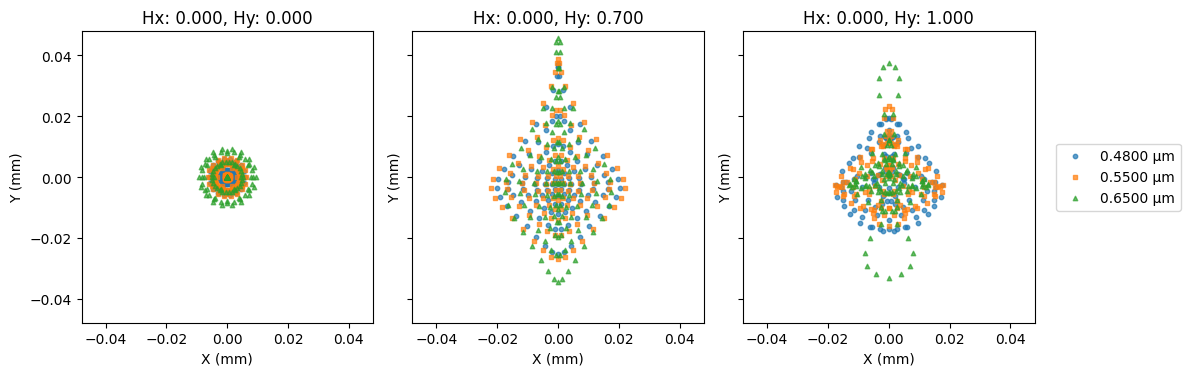

In [6]:
spot = analysis.SpotDiagram(lens)
spot.view()

In [7]:
spot.geometric_spot_radius()

[[np.float64(0.00597244087781219),
  np.float64(0.006286457711247116),
  np.float64(0.00931911440064303)],
 [np.float64(0.037177830728275296),
  np.float64(0.038646133928487814),
  np.float64(0.04561512437816262)],
 [np.float64(0.01951655430245225),
  np.float64(0.02342659090310306),
  np.float64(0.03747033587405113)]]

In [8]:
spot.rms_spot_radius()

[[np.float64(0.0037913354614487415),
  np.float64(0.004293689564257822),
  np.float64(0.006195618755673686)],
 [np.float64(0.015694600107670972),
  np.float64(0.016786721284463187),
  np.float64(0.019109151416249377)],
 [np.float64(0.01322916535715896),
  np.float64(0.012081348897953531),
  np.float64(0.013596802321536755)]]

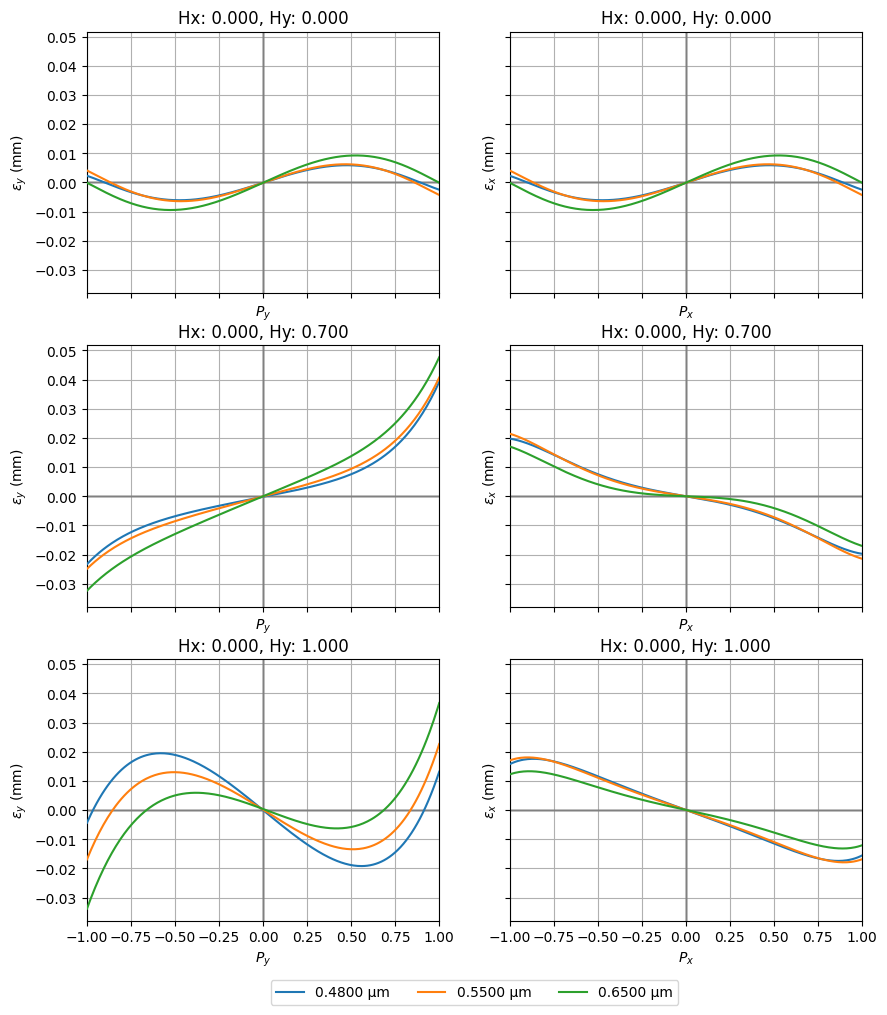

In [9]:
fan = analysis.RayFan(lens)
fan.view()

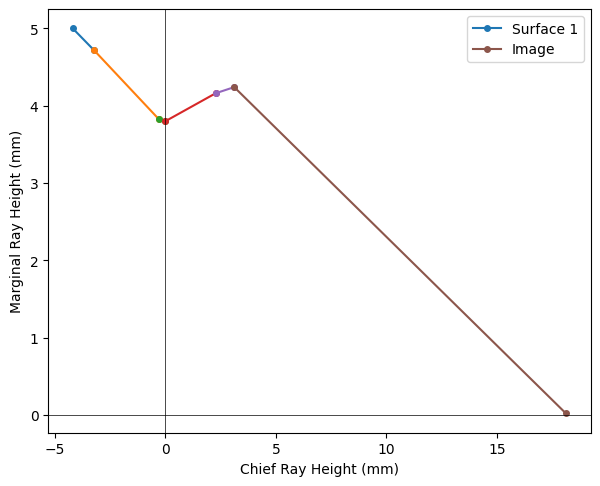

In [10]:
yybar = analysis.YYbar(lens)
yybar.view()

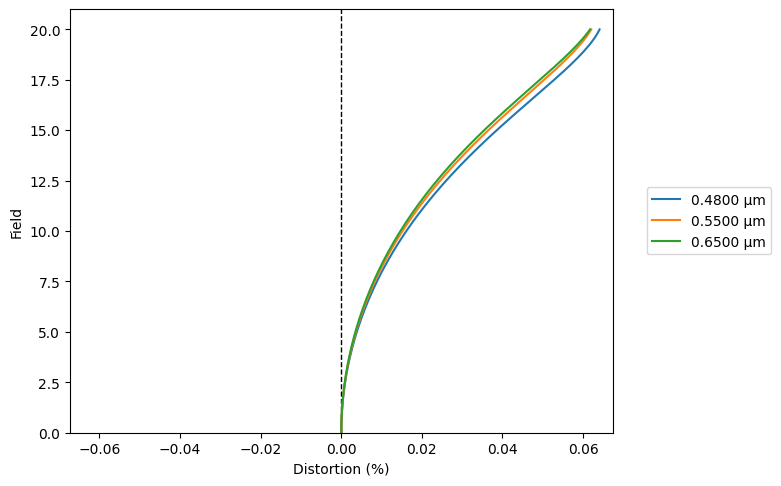

In [11]:
distortion = analysis.Distortion(lens)
distortion.view()

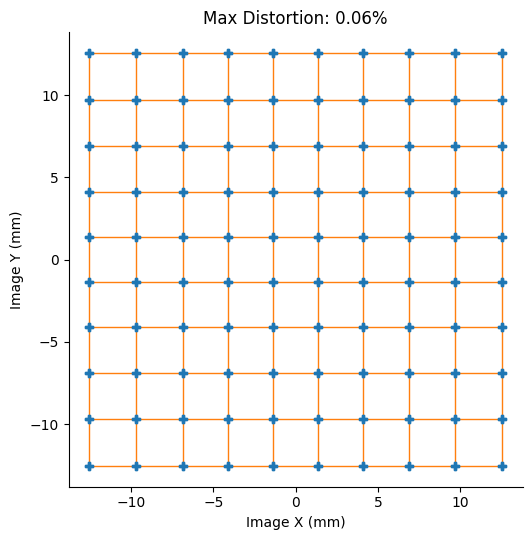

In [12]:
grid = analysis.GridDistortion(lens)
grid.view()

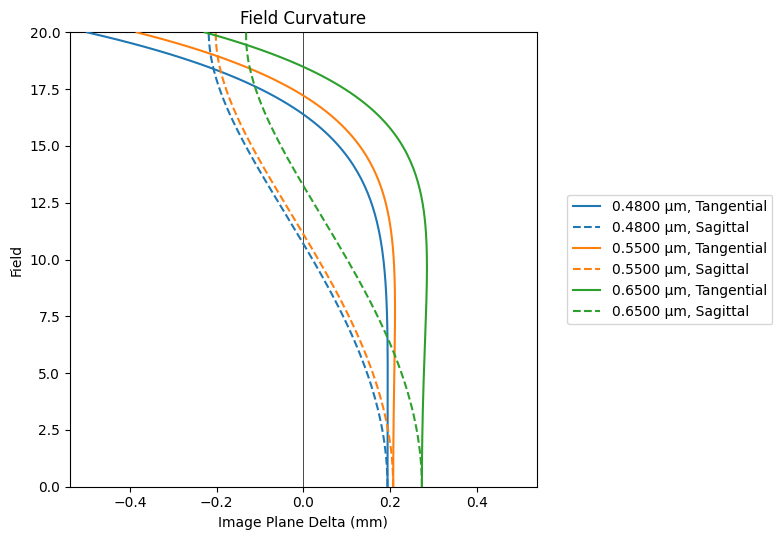

In [13]:
field_curv = analysis.FieldCurvature(lens)
field_curv.view()

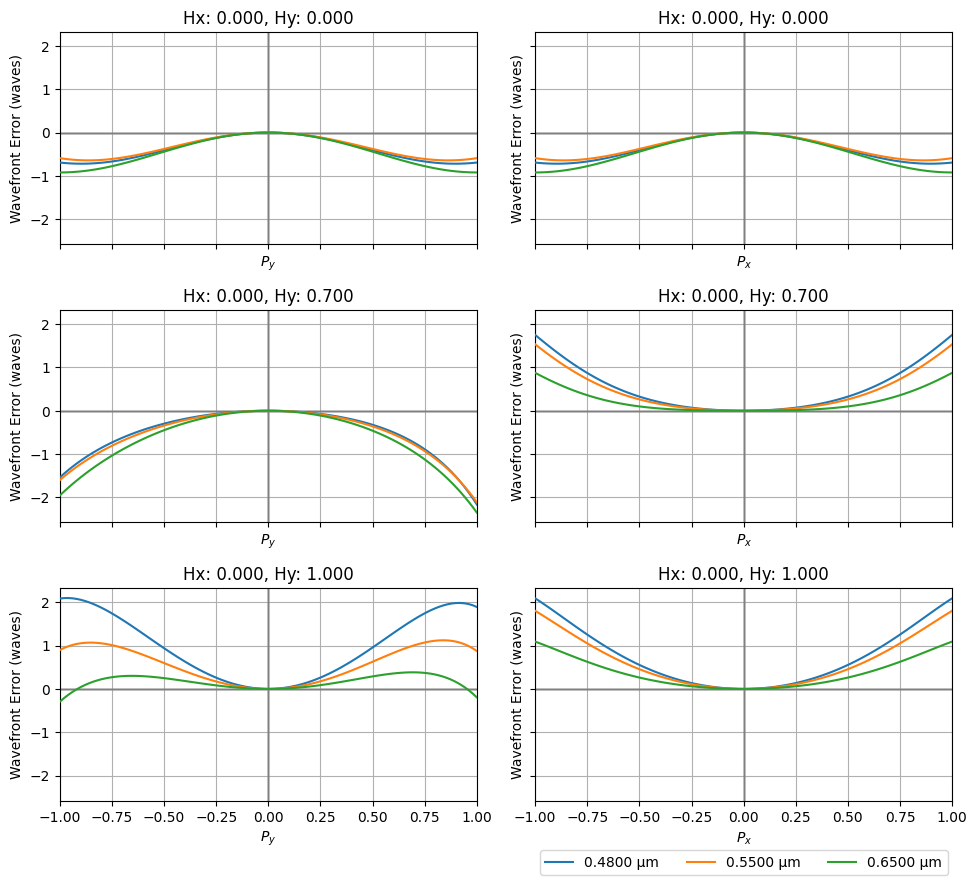

In [14]:
opd_fan = wavefront.OPDFan(lens)
opd_fan.view()

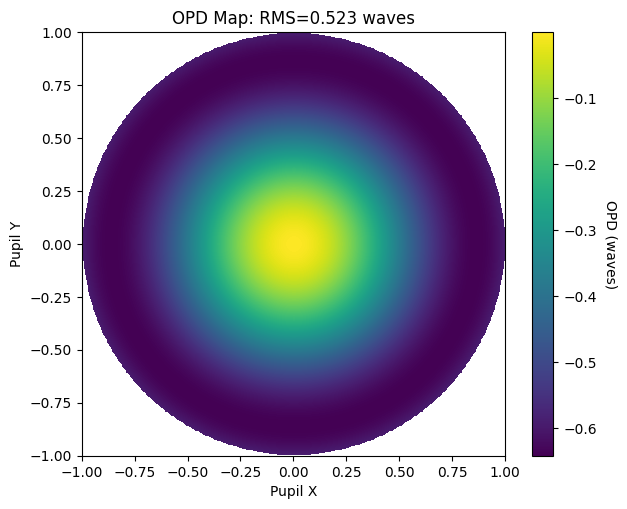

In [15]:
opd = wavefront.OPD(lens, field=(0, 0), wavelength=0.55)
opd.view(projection="2d", num_points=512)

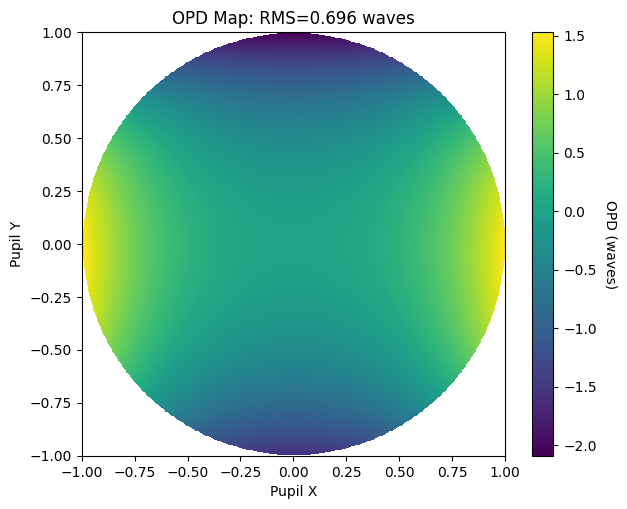

In [16]:
opd = wavefront.OPD(lens, field=(0, 0.7), wavelength=0.55)
opd.view(projection="2d", num_points=512)

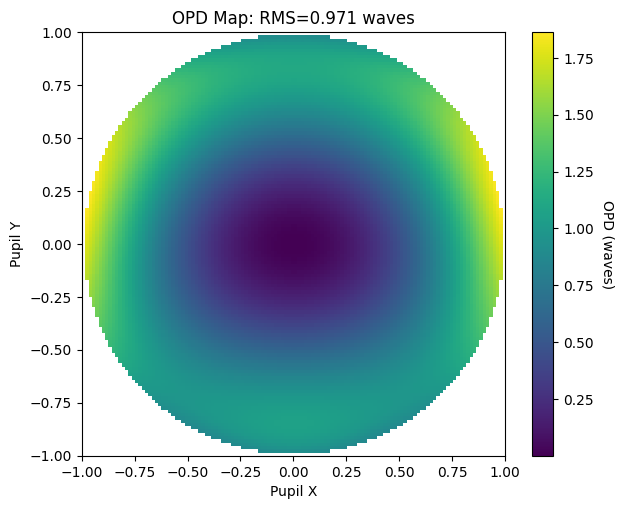

In [17]:
opd = wavefront.OPD(lens, field=(0, 1), wavelength=0.55)
opd.view(projection="2d", num_points=128)

In [18]:
zernike = wavefront.ZernikeOPD(lens, (0, 0), 0.55, zernike_type="fringe")
for k in range(len(zernike.coeffs)):
    print(f"Z{k + 1}: {zernike.coeffs[k]:.8f}")

Z1: -0.48600753
Z2: 0.00000000
Z3: 0.00000000
Z4: -0.27845288
Z5: -0.00000000
Z6: -0.00000000
Z7: -0.00000000
Z8: -0.00000000
Z9: 0.19194955
Z10: -0.00000000
Z11: -0.00000000
Z12: 0.00000000
Z13: -0.00000000
Z14: -0.00000000
Z15: -0.00000000
Z16: -0.01634860
Z17: 0.00000000
Z18: 0.00000000
Z19: 0.00000000
Z20: 0.00000000
Z21: -0.00000000
Z22: -0.00000000
Z23: -0.00000000
Z24: 0.00000000
Z25: -0.00077197
Z26: 0.00000000
Z27: 0.00000000
Z28: 0.00000000
Z29: -0.00000000
Z30: 0.00000000
Z31: 0.00000000
Z32: 0.00000000
Z33: 0.00000000
Z34: 0.00000000
Z35: 0.00000000
Z36: -0.00002947
Z37: -0.00000000


In [19]:
zernike = wavefront.ZernikeOPD(lens, (0, 0), 0.55, zernike_type="noll", num_terms=37)
for k in range(len(zernike.coeffs)):
    print(f"Z{k + 1}: {zernike.coeffs[k]:.8f}")

Z1: -0.48600865
Z2: 0.00000000
Z3: 0.00000000
Z4: -0.16076683
Z5: 0.00000000
Z6: -0.00000000
Z7: -0.00000000
Z8: -0.00000000
Z9: -0.00000000
Z10: -0.00000000
Z11: 0.08584008
Z12: 0.00000000
Z13: -0.00000000
Z14: 0.00000000
Z15: 0.00000000
Z16: -0.00000000
Z17: -0.00000000
Z18: 0.00000000
Z19: 0.00000000
Z20: 0.00000000
Z21: 0.00000000
Z22: -0.00618194
Z23: 0.00000000
Z24: -0.00000000
Z25: -0.00000000
Z26: 0.00000000
Z27: -0.00000000
Z28: -0.00000000
Z29: 0.00000000
Z30: -0.00000000
Z31: 0.00000000
Z32: 0.00000000
Z33: -0.00000000
Z34: 0.00000000
Z35: 0.00000000
Z36: 0.00000000
Z37: -0.00025995


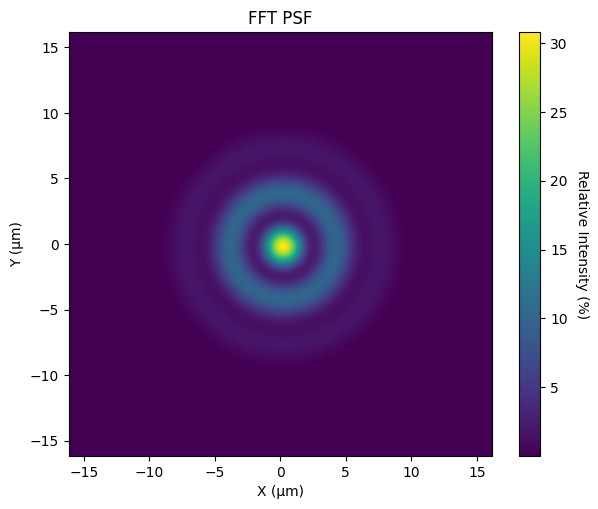

In [20]:
lens_psf = psf.FFTPSF(lens, (0, 0), 0.55)
lens_psf.view(projection="2d", num_points=256)

In [21]:
lens_psf.strehl_ratio()

np.float64(0.3081788994940472)

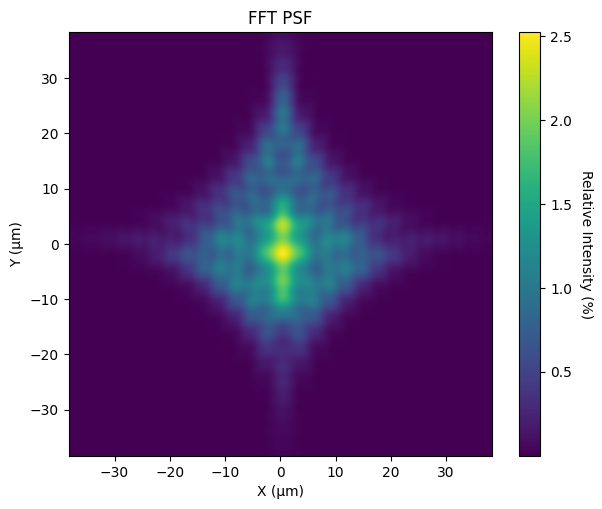

In [22]:
lens_psf = psf.FFTPSF(lens, (0, 0.7), 0.55)
lens_psf.view(num_points=256)

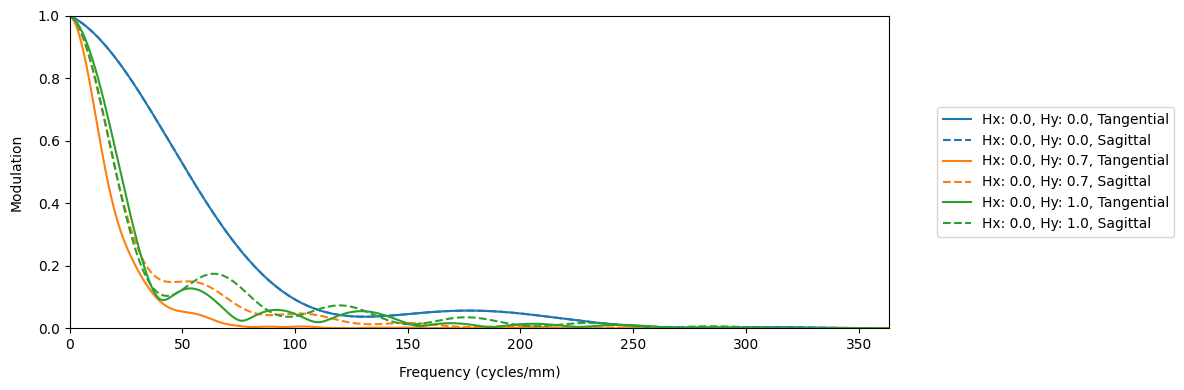

In [23]:
geo_mtf = mtf.GeometricMTF(lens)
geo_mtf.view()

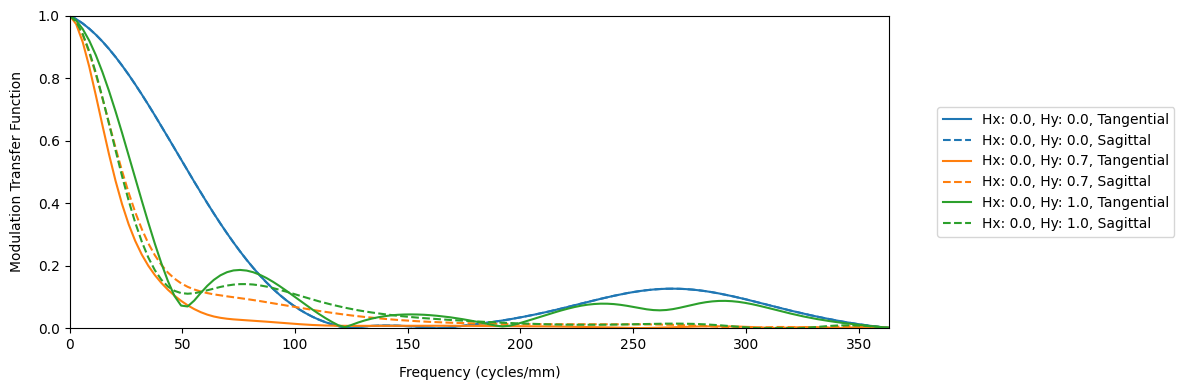

In [24]:
lens_mtf = mtf.FFTMTF(lens)
lens_mtf.view()